<a href="https://colab.research.google.com/github/roilhi/MetNum_ITECI_2020/blob/gh-pages/IslasMonica_TrabajoFinalMetNum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ITECI Universidad de Ensenada

Métodos númericos

Proyecto Final

Mónica Islas Saenz

In [ ]:
#Modulos necesarios
import math
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import Eq, solve_linear_system, Matrix
from sympy.interactive import printing
printing.init_printing(use_latex=True)

Calculo de Error Relativo Procentual $$\epsilon_r = \left \lvert \frac{V_r-Vn}{Vr}\right\rvert \times 100 $$

 U1 Raices de ecuaciones

Método de Bisección

Después de que una raíz de $𝑓(𝑥)=0$ se ha puesto entre corchetes en el intervalo $(𝑥_1, 𝑥_2)$, se pueden usar varios métodos para cerrarlo. El método de bisección logra esto dividiendo sucesivamente a la mitad el intervalo hasta que se vuelve lo suficientemente pequeño. Esta técnica también se conoce como método de reducción a la mitad del intervalo. La bisección no es el método más rápido disponible para calcular raíces, pero es el más confiable. Una vez que se ha puesto entre corchetes una raíz, la bisección siempre se cerrará en ella.

El método de bisección utiliza el mismo principio que la búsqueda incremental: si hay una raíz en el intervalo $(𝑥_1, 𝑥_2)$, entonces $𝑓(𝑥_1) y 𝑓(𝑥_2)$ tienen signos opuestos. Para dividir a la mitad el intervalo, calculamos $𝑓(𝑥_3)$, donde $x_3 = \frac{1}{2}(x_1 + x_2)$ es el punto medio del intervalo. Si $f(x_2)$ y $f(x_3)$ tienen signos opuestos, entonces la raíz debe estar en $(𝑥_2, 𝑥_2)$, y lo registramos reemplazando el límite original $𝑥_1$ por $𝑥_3$. De lo contrario, la raíz se encuentra en $(𝑥_1, 𝑥_3)$, en cuyo caso $𝑥_2$ se reemplaza por $𝑥_3$. En cualquier caso, el nuevo intervalo $(𝑥_1, 𝑥_2)$ es la mitad del tamaño del intervalo original. La bisección se repite hasta que el intervalo se ha reducido a un valor pequeño ε, de modo que:
$$\left | x_2-x_1 \right |\leq \varepsilon $$

Ejercicio 1 Calcular la aproximacion de la raíz usando el método de bisección en un intervalo de [-2,-1]

Función: $f(x)=x^3+4x^2-6$

In [ ]:
def f(x): 
    return x**3+4*x**2-6

Valor teórico

In [ ]:
Tv=-1.5720

Programa 

In [ ]:
def bisection (a,b,tol):
    xl=a
    xr=b
    while (np.abs(xl-xr)>tol):
        c=(xl+xr)/2.0
        prod=f(xl)*f(c)
        if prod > tol:
            xl=c
        else:
            if prod < tol:
                xr=c
    return c
answer1= bisection (-2,-1,1.0e-4)
print ("Raíz aproximada = ", answer1)

Raíz aproximada =  -1.57366943359375


In [ ]:
def PercentRelativeError(Tv,answer1):
    epsilon= abs((Tv-answer1)/Tv)*100
    return epsilon

In [ ]:
PercentRelativeError(Tv,answer1)

Gráfico

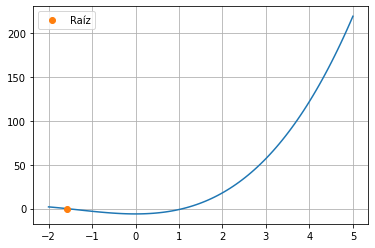

In [ ]:
x=np.linspace(-2,5,100)
plt.plot(x,f(x))
plt.plot(answer1,0,'o',label='Raíz')
plt.grid()
plt.legend()
plt.show()

U2 Interpolación y regresión lineal

Métodos de mínimos cuadrados

Si los datos se obtienen de experimentos, por lo general contienen una cantidad significativa de ruido aleatorio causado por errores de medición. La tarea del ajuste de curvas es encontrar una curva suave que se ajuste a los puntos de datos "en promedio". Esta curva debe tener una forma simple (por ejemplo, un polinomio de bajo orden), para no reproducir el ruido.
. 
$$f(x) = f(x;a_0, a_1, ... , a_)$$


Los coeficientes de la función de regresión lineal se obtienen mediante: 
$$a_1=\frac{n\sum x_iy_i-\sum x_i\sum y_i}{n\sum x_{i}^{2}-(\sum x_i)^{2}}$$ 

$$a_0=\bar y-a_1\bar x$$

Ejercicio 2 Calcular la regresión lineal de la función $f (x) = a_0 + a_1x$ por el método de los mínimos cuadrados.


Datos

In [ ]:
x= [1,2,3,4,5,6]
y= [5.04,8.12,10.64,13.18,16.20,20.04]

Programa

In [ ]:
n=len(x)
x= np.array(x)
y= np.array(y)
sumx=sum(x)
sumy=sum(y)
sumx2=sum(x*x)
sumy2=sum(y*y)
sumxy=sum(x*y)
promx=sumx/n
promy=sumy/n
m=((sumx*sumy)-(n*sumxy))/(sumx**2-(n*sumx2))
b=promy-(m*promx)

Ecuación de la recta

$$y=2.02+2.90x$$

Gráfico

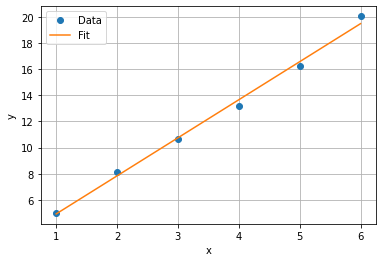

In [ ]:
plt.plot(x,y,'o',label='Data')
plt.plot(x,(m*x)+b,label='Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

U3 Integtación y diferenciación númerica

Simpson's 1/3

La regla 1/3 de Simpson se puede obtener de las fórmulas de Newton-Cotes con $𝑛 = 2$; es decir, pasando un interpolante parabólico a través de tres nodos adyacentes.

$$I= \left [ f(a)+4f(\frac{a+b}{2})+f(b) \right ]\frac{h}{3}$$

TPara obtener la regla compuesta de Simpson 1/3, el rango de integración $ (a, b) $ se divide en $ n $ paneles ($ n $ par) de ancho $ h = (b - a) / n $ cada uno.

Ejercicio 4 Calcular la siguiente integración

Función $$f(x)=(4x-3)^3$$

In [ ]:
def f(x):
    return ((4*x)-3)**3

Gráfico

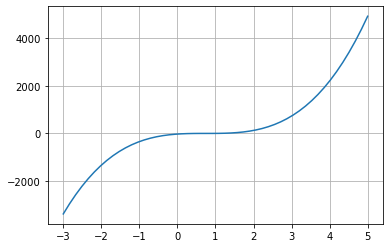

In [ ]:
x= np.linspace(-3,5,50)
plt.plot(x,f(x))
plt.grid()
plt.show()

Programa

In [ ]:
def simpson13(f,a,b):
    m=(b-a)/2
    integral=(b-a)/6*(f(a)+4*f(m)+f(b))
    return integral
a=-3
b=5
simpson13(f,a,b)

In [ ]:
def PercentRelativeError(vreal,vnum):
    epsilon= abs((vreal-vnum)/vreal)*100
    return epsilon

In [ ]:
PercentRelativeError(vreal,vnum)

U4 Sistemas de ecuaciones lineales 

Método de Gauss-Jordan

La eliminación de Gauss es el método más familiar para resolver ecuaciones simultáneas. Consta de dos partes: la fase de eliminación y la fase de sustitución hacia atrás.

Forma inicial
$$Ax=b$$

Sistema de ecuaciones

$$a_{11}x+a_{12}y+a_{13}z=b_1$$
$$a_{21}x+a_{22}y+a_{23}z=b_2$$
$$a_{31}x+a_{32}y+a_{33}z=b_3$$

$$A=\begin{bmatrix}
 a_{11}\, a_{12} \, a_{13}\\ 
a_{21} \,  a_{22}\,  a_{23}\\ 
a_{31} \,  a_{32} \, a_{33}
\end{bmatrix}$$ 

$$x=\begin{bmatrix}
 x\\ 
y\\ 
z 
\end{bmatrix}$$

$$b=\begin{bmatrix}
 b_1\\ 
b_2\\ 
b_3 
\end{bmatrix}$$

La función de la fase de eliminación es transformar las ecuaciones en la forma:
$$Ux = c$$

Ejercicio 4 Comprobar que $𝑥 = 2, 𝑦 = 1, 𝑧 = −2$ son las soluciones de las ecuaciones lineales.

Ecuaciones $$𝑥+2𝑦+𝑧=2$$ $$3𝑥+8𝑦+𝑧=12$$ $$4𝑦+𝑧=2$$

Programa

In [ ]:
eq1=sp.Function('eq1')
eq2=sp.Function('eq2')
eq3=sp.Function('eq3')
x,y,z= sp.symbols('x y z')
eq1= Eq(1*x+2*y+1*z,2)
eq2= Eq(3*x+8*y+1*z,12)
eq3= Eq(0*x+4*y+1*z,2)
row1=[1,2,1,2]
row2=[3,8,1,12]
row3=[0,4,1,2]
system= Matrix((row1,row2,row3))
display (system)


⎡1  2  1  2 ⎤
⎢           ⎥
⎢3  8  1  12⎥
⎢           ⎥
⎣0  4  1  2 ⎦

Solución

In [ ]:
solve_linear_system(system,x,y,z)